This code is intended to solve for traffic flow in a 1-Dimensional road. The mathematics are similar to a Non-linear Convection problem

In [60]:
import numpy as NPY
import math
from matplotlib import pyplot
%matplotlib inline

In [61]:
#Some Iniital Paramers

V_max= 80            #Max velocity of traffic flow in km/hr
Road_length=11       #Length of the 1D Road in km
Density_max = 250    # Max density of cars per km of road
NX = 51              #Apparently this is my number of 'X' steps
delta_t = 0.001      #This is my timestep duration, in hours

In [62]:
#Initial conditions determined by Problem Part A

x = NPY.linspace(0,Road_length, NX )  #An array to hold all of my X values

Density_variable= NPY.ones(NX)*10     #Creates an array for initial Densities, 51 spots, sets all values to 10
Density_variable[10:20]=50           #Changed my 10-20 density cells to be 50




In [63]:
x_steps = Road_length/NX
print("X-Steps are every:", x_steps, "Kilometers")

print(x)
print(Density_variable)

X-Steps are every: 0.21568627450980393 Kilometers
[  0.     0.22   0.44   0.66   0.88   1.1    1.32   1.54   1.76   1.98
   2.2    2.42   2.64   2.86   3.08   3.3    3.52   3.74   3.96   4.18
   4.4    4.62   4.84   5.06   5.28   5.5    5.72   5.94   6.16   6.38
   6.6    6.82   7.04   7.26   7.48   7.7    7.92   8.14   8.36   8.58
   8.8    9.02   9.24   9.46   9.68   9.9   10.12  10.34  10.56  10.78  11.  ]
[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.]


Need boundary condition that at x=0, the density of cars is 10, for all time "t"

Not lets capture some mathemtical Relationships

In [64]:
#Traffic Flux "F" is a function of density. F--> F(Density)

def Traffic_Flux(density_input, Max_Speed):      #made this have variable max speed for part 2      
      
    Density_max = 250    
    NX = 51              
    delta_t = 0.001
    Output_flux= (Max_Speed)*(1-(density_input/Density_max))
    return Output_flux
   

In [65]:
def Traffic_FLOW(nx, timestep):
    Road_length=11
    nt=timestep
    velocity_float = NPY.ones(NX)*0
    velocity_float_n = NPY.ones(NX)*0
    
    x = NPY.linspace(0,Road_length, NX )  
    Density_variable= NPY.ones(NX)*10     
    Density_variable[10:20]=50 

    for i in range (nt):
       
        Density_variable_n=Density_variable.copy()
    
        for j in range (NX):
       
            Density_variable[j] = Density_variable[j] - (delta_t/x_steps)*(Traffic_Flux(Density_variable[j],80)-Traffic_Flux(Density_variable[j-1],80)) 
            Density_variable[0]=10   #boundary condition
         
        for j in range (NX):
            velocity_float[j] = (Traffic_Flux(Density_variable[j],80)/Density_variable[j])
            
    pyplot.plot(x,Density_variable)
    pyplot.plot(x,velocity_float)
    
    
    return Density_variable, velocity_float
        

[ 10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          50.05934545  49.99991195
  50.00000013  50.          50.          50.          50.          50.          50.
  50.           9.94065455  10.00008805   9.99999987  10.          10.          10.
  10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.        ]
[ 7.68        7.68        7.68        7.68        7.68        7.68        7.68
  7.68        7.68        7.68        1.2781032   1.28000282  1.28        1.28
  1.28        1.28        1.28        1.28        1.28        1.28
  7.7277598   7.67992956  7.6800001   7.68        7.68        7.68        7.68
  7.68        7.68        7.68        7.68        7.68        7.68      

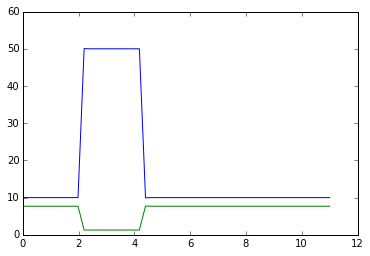

In [66]:
r, v = Traffic_FLOW(51,1)
print(r)
print(v)